<a href="https://colab.research.google.com/github/HamnahUmmerKK/CognoRise-Infotech/blob/machine-learning/spam_email_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA**

In [48]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

** DATA LOADING**

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
df=pd.read_csv('/content/drive/MyDrive/Cognorise info tech internship ML/spam.csv',encoding='ISO-8859-1')
df

Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ã¼ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

**DATA EXPLORATION**

In [52]:
df.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

In [53]:
df.tail()

Category                                            Message
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ã¼ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

In [54]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [55]:
df.dtypes

Category    object
Message     object
dtype: object

In [56]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

**DATA VISUALIZATION**

<ipython-input-57-31d3facf83ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Category'],data=df,palette='Set1')


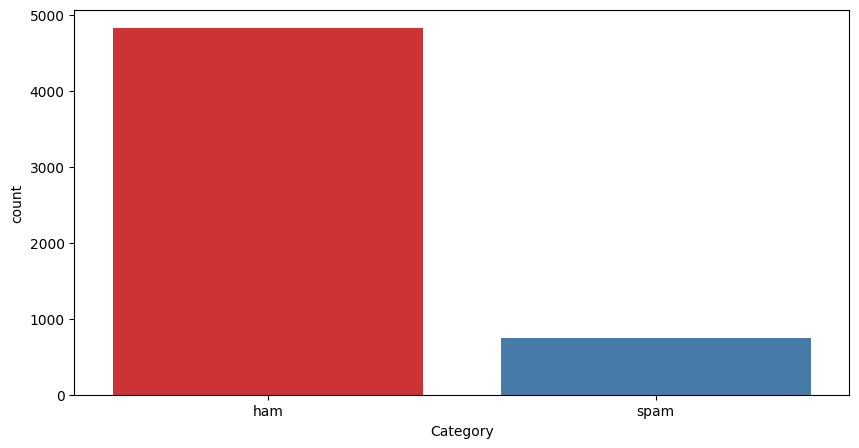

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Category'],data=df,palette='Set1')
plt.show()
pass

**Mapped Category columns into numerical**

In [58]:

df['Category']=df['Category'].map({'ham':1,'spam':0})
df

Category                                            Message
0            1  Go until jurong point, crazy.. Available only ...
1            1                      Ok lar... Joking wif u oni...
2            0  Free entry in 2 a wkly comp to win FA Cup fina...
3            1  U dun say so early hor... U c already then say...
4            1  Nah I don't think he goes to usf, he lives aro...
...        ...                                                ...
5567         0  This is the 2nd time we have tried 2 contact u...
5568         1              Will Ã¼ b going to esplanade fr home?
5569         1  Pity, * was in mood for that. So...any other s...
5570         1  The guy did some bitching but I acted like i'd...
5571         1                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [59]:
tweets=df['Message']
tweets

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ã¼ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

**# tokenization**

In [60]:

from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))#(to apply lambda fuction we use .apply)
tweets

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568              Will Ã ¼ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

**# removal of special character**

In [61]:

tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')   #+ is used to remove combination of special characters
tweets

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568              Will Ã ¼ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

**# collecting words of length 3 or more**

In [62]:

from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

0       until jurong point crazy Available only bugis ...
1                              lar ... Joking wif oni ...
2       Free entry wkly comp win Cup final tkts 21st M...
3              dun say early hor ... already then say ...
4         Nah n't think goes usf lives around here though
                              ...                        
5567    This the 2nd time have tried contact have won ...
5568                            Will going esplanade home
5569     Pity was mood for that ... any other suggestions
5570    The guy did some bitching but acted like inter...
5571                               Rofl Its true its name
Name: Message, Length: 5572, dtype: object

**# stemming**

In [63]:

from nltk.stem import SnowballStemmer
st=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[st.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0       until jurong point crazi avail onli bugi great...
1                                lar ... joke wif oni ...
2       free entri wkli comp win cup final tkts 21st m...
3              dun say earli hor ... alreadi then say ...
4           nah n't think goe usf live around here though
                              ...                        
5567    this the 2nd time have tri contact have won th...
5568                                will go esplanad home
5569         piti was mood for that ... ani other suggest
5570    the guy did some bitch but act like interest b...
5571                                 rofl it true it name
Name: Message, Length: 5572, dtype: object

**# stop words remove**

In [64]:

from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x: [i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets

0       jurong point crazi avail onli bugi great world...
1                                lar ... joke wif oni ...
2       free entri wkli comp win cup final tkts 21st m...
3                   dun say earli hor ... alreadi say ...
4                nah n't think goe usf live around though
                              ...                        
5567    2nd time tri contact 750 pound prize claim eas...
5568                                     go esplanad home
5569                            piti mood ... ani suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

**VECTORIZATION**

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<5572x7111 sparse matrix of type '<class 'numpy.float64'>'
	with 44739 stored elements in Compressed Sparse Row format>

In [66]:
print(data)

  (0, 6792)	0.20203047130059745
  (0, 1041)	0.3657318424884653
  (0, 3037)	0.16954368353003973
  (0, 1817)	0.3089717384520193
  (0, 1584)	0.34913057628928906
  (0, 6968)	0.24517543868729555
  (0, 3075)	0.20165655308257646
  (0, 1586)	0.3089717384520193
  (0, 4616)	0.17518120543397994
  (0, 1228)	0.2757692060536668
  (0, 2021)	0.28323413617381227
  (0, 4921)	0.249729434431227
  (0, 3648)	0.3657318424884653
  (1, 4614)	0.5892230337773975
  (1, 6891)	0.4625935436300812
  (1, 3617)	0.49506982696691904
  (1, 3782)	0.44014690307313215
  (2, 78)	0.26925934551321457
  (2, 1113)	0.19168304296989988
  (2, 5180)	0.19168304296989988
  (2, 6522)	0.14252905753185302
  (2, 5953)	0.22548435271094622
  (2, 5137)	0.18908621197977196
  (2, 5220)	0.1851828562535381
  (2, 798)	0.253129013723142
  :	:
  (5567, 5043)	0.21170966726633056
  (5567, 4802)	0.22662333966656326
  (5567, 4616)	0.17476566758942588
  (5568, 2549)	0.782681381846728
  (5568, 2999)	0.43953417232463426
  (5568, 3280)	0.4407034897404325
  

In [67]:
data.shape

(5572, 7111)

**Y CATOGORIZED **

In [68]:
y=df['Category'].values
y

array([1, 1, 0, ..., 1, 1, 1])

**TRAIN TEST SPLIT**

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=42)

In [70]:
x_train

<3900x7111 sparse matrix of type '<class 'numpy.float64'>'
	with 31493 stored elements in Compressed Sparse Row format>

**MODEL CREATION AND PERFORMANCE EVALUATION**

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
lr=LogisticRegression()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
abc=AdaBoostClassifier()
lst=[lr,rf,knn,abc]

In [72]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("model",i)
  print(y_pred)
  print("score is",accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

model LogisticRegression()
[1 1 1 ... 1 0 1]
score is 0.9575358851674641
[[ 154   70]
 [   1 1447]]
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       224
           1       0.95      1.00      0.98      1448

    accuracy                           0.96      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672

model RandomForestClassifier()
[1 1 1 ... 1 0 1]
score is 0.9808612440191388
[[ 192   32]
 [   0 1448]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       224
           1       0.98      1.00      0.99      1448

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672

model KNeighborsClassifier()
[1 1 1 ... 1 1 1]
score is 0.9013157894736842
[[  59  165]
 [   0 1448]]
              precision    recall  f1-sc